# Subplots and Pivoting

(Lecture 9)

In this lecture we will continue our journey of pandas after reviewing a few more details of `matplotlib`

    
1. [Grid of subplots](#Grid-of-subplots)
   * [Annotations](#Annotations)
   * [Legends](#Legends)
2. [More pandas](#More-pandas)
   * [Assign](#Assign)
   * [Pivoting](#Pivoting)
3. [Smoking Data](#Smoking-Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


## Grid of subplots

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).

You can think of the Figure object as a box-like container holding one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels:

![https://realpython.com/python-matplotlib-guide](figs/fig_axes_map.png)

#### Via `add_subplot()`



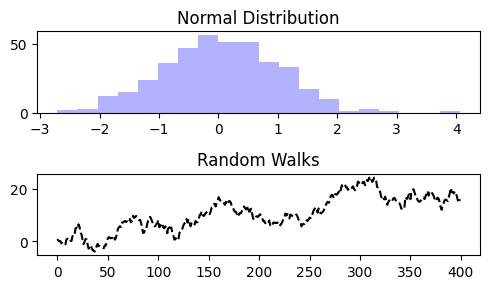

In [ ]:
#create a grid of two rows and one column
fig = plt.figure(figsize=(5, 3))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

RanNums = np.random.standard_normal(400)
ax1.hist(RanNums, bins=20, color="blue", alpha=0.3);
ax1.set_title("Normal Distribution");

RanWalk = RanNums.cumsum()
ax2.plot(RanWalk, color="black", linestyle="dashed");
ax2.set_title("Random Walks");
fig.tight_layout()

#### Via `subplots()`

To make creating a grid of subplots more convenient, matplotlib includes a `plt.subplots` method that creates a new figure and returns a NumPy array containing the created subplot objects:

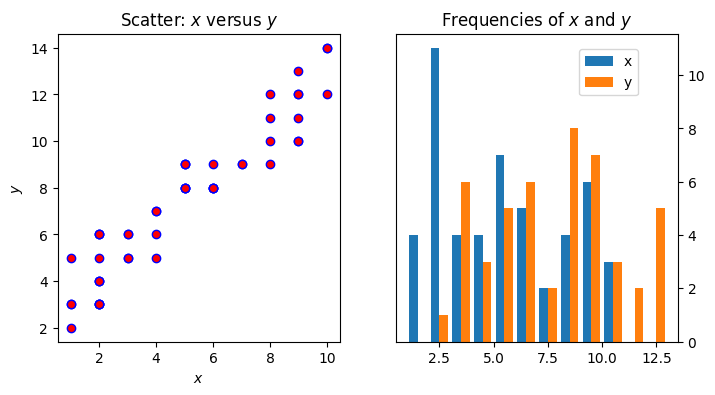

In [ ]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

<table class="table">
<caption>Table&nbsp;9.1: <code>matplotlib.pyplot.subplots</code> options</caption>
<thead>
<tr class="header">
<th style="text-align: left;">Argument</th>
<th style="text-align: left;">Description</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td style="text-align: left;"><code>nrows</code></td>
<td style="text-align: left;">Number of rows of subplots</td>
</tr>
<tr class="even">
<td style="text-align: left;"><code>ncols</code></td>
<td style="text-align: left;">Number of columns of subplots</td>
</tr>
<tr class="odd">
<td style="text-align: left;"><code>sharex</code></td>
<td style="text-align: left;">All subplots should use the same x-axis ticks (adjusting the <code>xlim</code> will affect all subplots)</td>
</tr>
<tr class="even">
<td style="text-align: left;"><code>sharey</code></td>
<td style="text-align: left;">All subplots should use the same y-axis ticks (adjusting the <code>ylim</code> will affect all subplots)</td>
</tr>
<tr class="odd">
<td style="text-align: left;"><code>subplot_kw</code></td>
<td style="text-align: left;">Dictionary of keywords passed to <code>add_subplot</code> call used to create each subplot</td>
</tr>
<tr class="even">
<td style="text-align: left;"><code>**fig_kw</code></td>
<td style="text-align: left;">Additional keywords to <code>subplots</code> are used when creating the figure, such as <code>plt.subplots(2, 2, figsize=(8, 6))</code></td>
</tr>
</tbody>
</table>

### Annotations

In [ ]:
from datetime import datetime
url = "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/spx.csv"
stock_data = pd.read_csv(url, index_col=0, parse_dates=True)
spx = stock_data["SPX"]

In [ ]:
stock_data.head()

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [ ]:
spx[0]

spx["2007-10-11"]

spx.asof(datetime(2007, 10, 11))

1554.41

In [ ]:
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

#crisis_data[0][0]
spx.asof(crisis_data[0][0])

1554.41

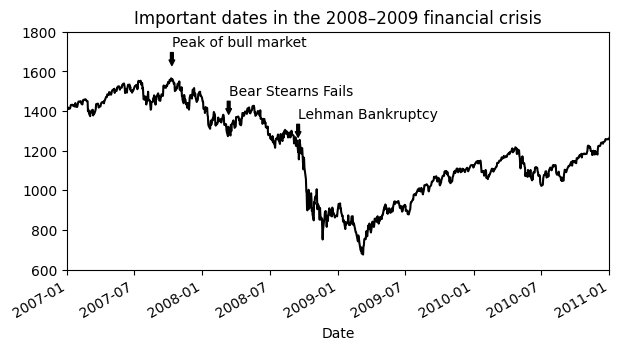

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3.5))

spx.plot(ax=ax, color="black");

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis");


### Legends

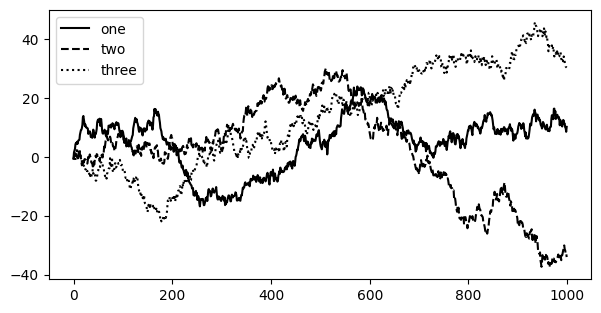

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed",label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",label="three");
#I would expect a legend to be a lot of work
# I would have to specify which lines has which legend
ax.legend();

### Math Notations in Notebook

If you wanted to show a sum using fancy math notations you would deploy **Latex**

$\alpha = \sum_{i=1}^N{\sqrt{x_i}}$

## Pandas

### Assign

We have already created new columns on the fly by the `[]` method.
There is also a built-in method `assign()`

In [ ]:
df = pd.DataFrame({'temp_c': [17.0, 25.0]},index=['Portland', 'Berkeley'])
df

,temp_c
Portland,17.0
Berkeley,25.0


create a new column which measures temperature in Fahrenheit $9/5 \cdot C + 32$

In [ ]:
#method1
df["temp_f"] = 9/5 * df["temp_c"] + 32
df


,temp_c,temp_f
Portland,17.0,62.6
Berkeley,25.0,77.0


In [ ]:
df.assign(temp_f=df['temp_c'] * 9 / 5 + 32)

,temp_c,temp_f
Portland,17.0,62.6
Berkeley,25.0,77.0


In [ ]:
df.assign(temp_f = df['temp_c'] * 9 / 5 + 32,
          temp_k = df['temp_c'] + 273.15)

,temp_c,temp_f,temp_k
Portland,17.0,62.6,290.15
Berkeley,25.0,77.0,298.15


In [ ]:
#What does lambda mean ?
def ConvertCtoF(x):
  return x['temp_c'] * 9 / 5 + 32

#ConvertCtoF(df)
df.assign(temp_f = ConvertCtoF(df))

#this is a lot of overhead to efine a function that does basically a one-liner
lambda x: x['temp_c'] * 9 / 5 + 32

,temp_c,temp_f
Portland,17.0,62.6
Berkeley,25.0,77.0


You can create multiple columns within the same assign where one of the columns depends on another one defined within the same assign:

In [ ]:
df.assign(temp_f=lambda x: x['temp_c'] * 9 / 5 + 32,
    temp_k=lambda x: (x['temp_f'] + 459.67) * 5 / 9)

,temp_c,temp_f,temp_k
Portland,17.0,62.6,290.15
Berkeley,25.0,77.0,298.15


### Pivoting


In Pandas, the pivot table function takes simple data frame as input, and performs grouped operations that provides a multidimensional summary of the data.

You can also think of it as a **long to wide** translation.

In [ ]:
stocks_long = pd.read_csv('https://gist.githubusercontent.com/alexdebrie/b3f40efc3dd7664df5a20f5eee85e854/raw/ee3e6feccba2464cbbc2e185fb17961c53d2a7f5/stocks.csv')
stocks_long.head()

,date,symbol,open,high,low,close,volume
0,2019-03-01,AMZN,1655.13,1674.26,1651.00,1671.73,4974877
1,2019-03-04,AMZN,1685.00,1709.43,1674.36,1696.17,6167358
2,2019-03-05,AMZN,1702.95,1707.80,1689.01,1692.43,3681522
3,2019-03-06,AMZN,1695.97,1697.75,1668.28,1668.95,3996001
4,2019-03-07,AMZN,1667.37,1669.75,1620.51,1625.95,4957017


In [ ]:
stocks_long["date"].unique()
#stocks_long["symbol"].unique()
stocks_long.shape

(15, 7)

The data has a number of columns and that the rows are organized by trading date and stock symbol.

That organization may be helpful for some analysis, but it can be hard to glean information about trading volume across dates and stock symbols. Let’s reshape our data to look closer at volume.

In [ ]:
stocks_wide = stocks_long.pivot(index='symbol', columns='date', values='volume')
print(stocks_wide.shape)
stocks_wide

(3, 5)


date,2019-03-01,2019-03-04,2019-03-05,2019-03-06,2019-03-07
symbol,,,,,
AAPL,25886167,27436203,19737419,20810384,24796374
AMZN,4974877,6167358,3681522,3996001,4957017
GOOG,1450316,1446047,1443174,1099289,1166559


How to use the Pandas pivot method

To use the pivot method in Pandas, you need to specify three parameters:

- Index: Which column should be used to identify and order your rows vertically

- Columns: Which column should be used to create the new columns in our reshaped DataFrame. Each unique value in the column stated here will create a column in our new DataFrame.

- Values: Which column(s) should be used to fill the values in the cells of our DataFrame.

In the example below, I use pivot to examine the closing trading price for each stock symbol over our trading window.

In [ ]:
stocks_long.pivot(index='date', columns='symbol', values=['close', "volume"])

close                        volume                      
symbol        AAPL     AMZN     GOOG        AAPL       AMZN       GOOG
date                                                                  
2019-03-01  174.97  1671.73  1140.99  25886167.0  4974877.0  1450316.0
2019-03-04  175.85  1696.17  1147.80  27436203.0  6167358.0  1446047.0
2019-03-05  175.53  1692.43  1162.03  19737419.0  3681522.0  1443174.0
2019-03-06  174.52  1668.95  1157.86  20810384.0  3996001.0  1099289.0
2019-03-07  172.50  1625.95  1143.30  24796374.0  4957017.0  1166559.0

### Apply

As an example of dealing with time series in pandas, consider a financial dataset originally obtained from Yahoo! Finance containing end-of-day prices for a few stocks and the S&P 500 index (the `SPX` symbol).

Note that we activate the `parse_dates=True` option:

In [2]:
url="https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/stock_px.csv"

close_px = pd.read_csv(url, parse_dates=True, index_col=0)
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


Next, we compute percent change on `close_px` using the pandas function `pct_change`:

In [3]:
rets = close_px.pct_change().dropna()
rets

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


We can apply a function along an axis of the DataFrame:

In [18]:
def spx_corr(df):
   return df.corr(rets["SPX"])

rets.apply(spx_corr)

AAPL    0.564474
MSFT    0.714763
XOM     0.764643
SPX     1.000000
dtype: float64

------------------------------------

## Smoking Data

3 columns: "outcome" measures whether the person is still alive after 10 years.

We want to glean the effect of smoking on survival probability.

In [ ]:
df = pd.read_csv("https://calmcode.io/datasets/smoking.csv")
df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [ ]:
df.shape

(1314, 3)

In [ ]:
df.mean()

<ipython-input-47-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


age    46.920091
dtype: float64

In [ ]:
df = df.assign(alive = (df['outcome'] == 'Alive').astype(int),
               smokes = (df['smoker'] == 'Yes').astype(int))
df.head()

,outcome,smoker,age,alive,smokes
0,Alive,Yes,23,1,1
1,Alive,Yes,18,1,1
2,Dead,Yes,71,0,1
3,Alive,No,67,1,0
4,Alive,No,64,1,0


In [ ]:
df.mean()
#71.9% is  is the overall survival rate for all people
#How would you separately compute this for smokers and non smokers ?
#groupby is your friend !!

<ipython-input-49-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


age       46.920091
alive      0.719178
smokes     0.442922
dtype: float64

Smoking is good for your health

In [ ]:
df.groupby(['smoker']).alive.mean()

smoker
No     0.685792
Yes    0.761168
Name: alive, dtype: float64

In [ ]:
df.groupby(['smoker']).agg(prob=('alive', np.mean))

,prob
smoker,
No,0.685792
Yes,0.761168


Age adjustment

In [ ]:
df = df.assign(age10 =np.round(df['age'] / 10) * 10)

In [ ]:
(df.groupby(['age10'])
  .agg(p_alive=('alive', np.mean)
   ,p_smokes=('smokes', np.mean)))

,p_alive,p_smokes
age10,,
20.0,0.980645,0.445161
30.0,0.972332,0.438735
40.0,0.900000,0.495833
50.0,0.821622,0.632432
60.0,0.587302,0.464286
70.0,0.203947,0.236842
80.0,0.000000,0.168831


In [3]:
from datetime import datetime

datetime(2018, 6, 24)

datetime.datetime(2018, 6, 24, 0, 0)

Group by age and smoking status and plot the survival rates separately for the two groups

--------------------------

Further Reading:

- [](#)